In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from matplotlib import cm
from scipy.misc import imsave
from scipy.misc import imread
import math
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
#F = [[  7.87764845e-07,   1.67846650e-05,  -3.06015229e-03],[  2.09742893e-05,  -7.96807726e-06,  -3.89433111e-02],[ -3.54019323e-03,   3.40472708e-02,   9.98650241e-01]]
F = [[  2.77791933e-05,  -1.26248376e-05,  -6.47767092e-03],[  9.69070625e-06,  -6.44460165e-06,  -1.72986878e-03], [ -4.75653016e-03,   2.57572179e-03,   9.99962893e-01]]
Matr = F
MatrixL = np.array(Matr)
MatrixR = MatrixL.transpose()
Freq = 100.*1000.
DeltaT = 1/Freq
dfL = pd.read_csv('Cam L 18333 track_19m.csv')
dfR = pd.read_csv('Cam R 18158 track_15m.csv')
imgL = imread('v0.png')
imgR = imread('u0.png')
x = np.arange(0,384,1)
dfL.columns = ['Frame', 'cL','yL','xL','AmpL']
dfR.columns = ['Frame', 'cR','yR','xR','AmpR']
dfL = dfL.sort_values(['Frame'])
dfR = dfR.sort_values(['Frame'])
dfL = dfL.set_index('Frame')
dfR = dfR.set_index('Frame')
df = pd.concat([dfL,dfR], axis=1)
df = df.dropna()
df.head()
df['Time'] = df.index*DeltaT
df.to_csv("Track.csv")

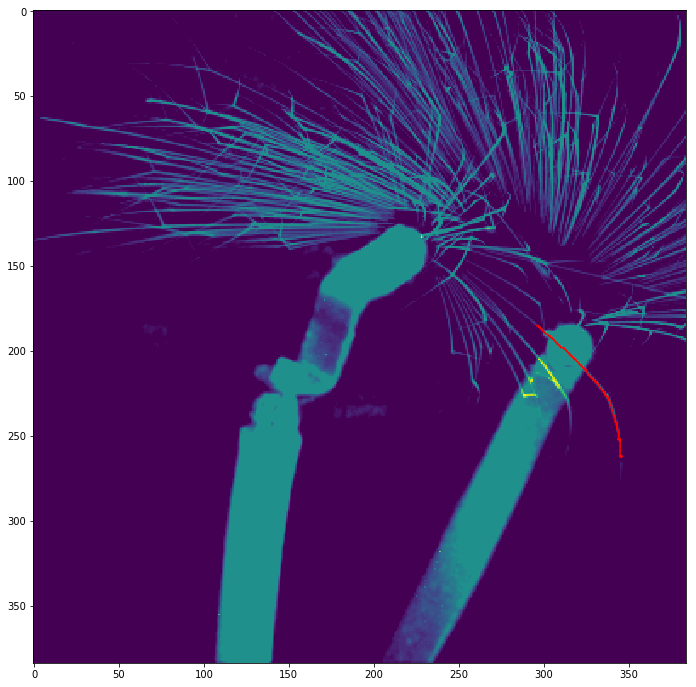

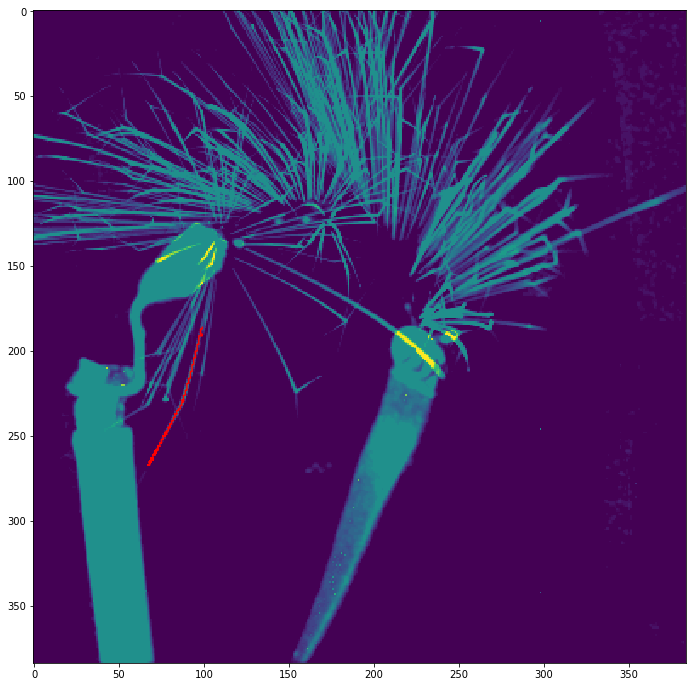

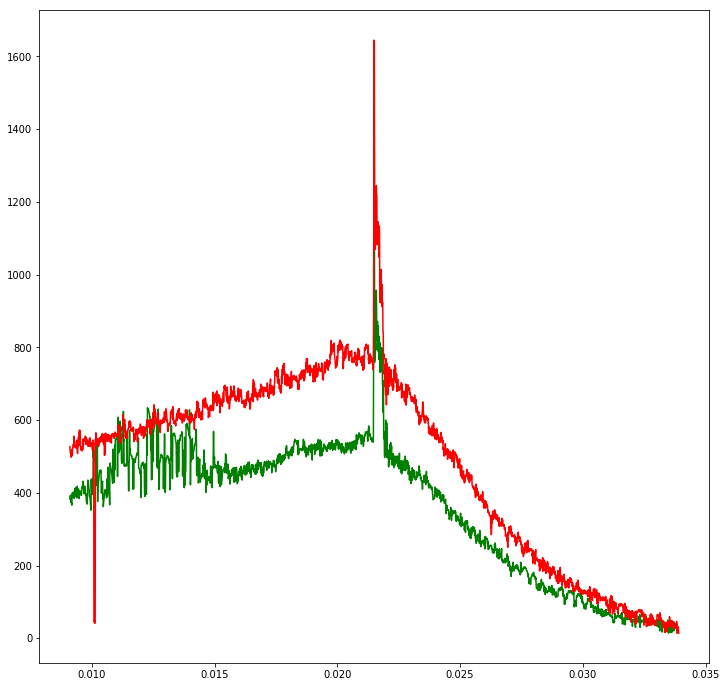

In [6]:
FrameL_sum = imread('frameL_sum.tif')
FrameR_sum = imread('frameR_sum.tif')
FrameL_sum[FrameL_sum>20] = 20
FrameR_sum[FrameR_sum>20] = 20
imgL[imgL>20]=20
imgR[imgR>20]=20
plt.figure(figsize=(12,12))
plt.imshow(imgL+FrameL_sum)
plt.plot(df['xL'],df['cL'],color='r')
#plt.plot(dfR['xx (horiz)'],dfR['yy (vt)'])
plt.show()
plt.figure(figsize=(12,12))
plt.imshow(imgR+FrameR_sum)
plt.plot(df['xR'],df['cR'],color='r')
plt.show()
plt.show()
plt.figure(figsize=(12,12))
plt.plot(df['Time'],df['AmpL'],'g')
plt.plot(df['Time'],df['AmpR'],'r')
plt.show()

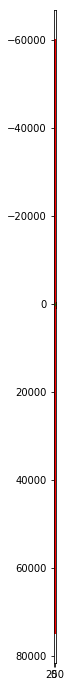

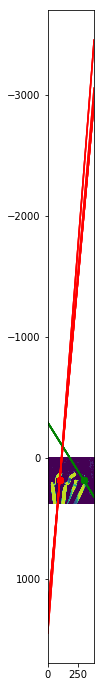

In [14]:
plt.figure(figsize=(12,12))
plt.imshow(imgL+imgR)
#for ii in range(len(df)):
for ii in range(0,10):
    frame = df.index[ii]
    xL = df['xL'].iloc[ii]
    yL = df['cL'].iloc[ii]
    xR = df['xR'].iloc[ii]
    yR = df['cR'].iloc[ii]
    ipL = [xL,yL,1]
    ipR = [xR,yR,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    LineyL = (-LineL[2]-LineL[0]*x)/LineL[1]
    LineyR = (-LineR[2]-LineR[0]*x)/LineR[1]
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
    plt.plot(x,LineyL,color='g')
    plt.plot(x,LineyR,color='r')
    plt.plot(xL,yL,'o',color='g')
    plt.plot(xR,yR,'o',color='r')
    #print(ii,frame,xL,yL,xR,yR,dlr,drl)
plt.show()

In [12]:
for ii in range(0,10):
    frame = df.index[ii]
    xL = df['xL'].iloc[ii]
    yL = df['cL'].iloc[ii]
    xR = df['xR'].iloc[ii]
    yR = df['cR'].iloc[ii]
    print(frame,xL,yL,xR,yR)

(911, 296.0, 185.0, 99.0, 186.0)
(912, 296.0, 185.0, 99.0, 186.0)
(913, 296.0, 185.0, 99.0, 186.0)
(914, 296.0, 185.0, 99.0, 186.0)
(915, 296.0, 185.0, 99.0, 186.0)
(916, 297.0, 185.0, 99.0, 186.0)
(917, 297.0, 185.0, 99.0, 186.0)
(918, 297.0, 185.0, 99.0, 186.0)
(919, 297.0, 186.0, 99.0, 186.0)
(920, 297.0, 186.0, 99.0, 186.0)
